In [1]:
import sys
sys.path.insert(0,"/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/LibFolder")
from Lib_GeneralFunctions import *
from Lib_GeneralSignalProcNAnalysis import *
from Lib_SigmoidProcessing import *
import pandas as pd
from matplotlib.gridspec import GridSpec

In [2]:
# Save into a class the 
class SSCreference:
    def __init__(self, filename, coordinates, RefSource="SEM2DPACK"):
        
        line = pd.read_csv(filename.format("slip"), header=None)
        self.Time = line[0]
        self.Slip = line[1]
        
        line = pd.read_csv(filename.format("sr"), header=None)
        self.SlipRate = line[1]
        
        self.Coord = coordinates #Only used for labels and printing
        self.RefSource = RefSource
    #end __init__
    
    # Default object printing information
    def __repr__(self):
        return "The TPV3reference object was generated from: {} and the receiver is located at {}".format(self.RefSource, self.Coord)
    #end __repr__
    
    def __str__(self):
        return "The TPV3reference object was generated from: {} and the receiver is located at {}".format(self.RefSource, self.Coord)
    #end __str__
    
    def PlotReference(self, ax, SlipSlipRate, filtering=True, **kwargs):
        
        if SlipSlipRate=="Slip":
            if(filtering):
                ax.plot(self.Time, Butterworth(self.Slip, **kwargs), label = "", c = "k", ls = "--", zorder=1)
            else:
                ax.plot(self.Time, self.Slip, label = "", c = "k", ls = "--", zorder=1)
        elif SlipSlipRate=="SlipRate":
            if(filtering):
                ax.plot(self.Time, Butterworth(self.SlipRate, **kwargs), label = "", c = "k", ls = "--", zorder=1)
            else:
                ax.plot(self.Time, self.SlipRate, label = "", c = "k", ls = "--", zorder=1)
            
        return ax

    
def GenericFigAxis():
    fig = plt.figure(figsize=[15,5])
    gs = GridSpec(1, 2)

    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    
    
    return fig, [ax1, ax2]
    
def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.set_xlim(-0.5,4)
        ax.set_ylim(-0.5,8)
        ax.set_xlabel("time(s)")
        
    Lines = fig.axes[-1].get_lines()
    
    legend2 = fig.axes[-1].legend(Lines, ['2km','4km', '6km', '8km'], loc=1)
    fig.axes[-1].add_artist(legend2)
    fig.axes[-1].set_ylabel("Slip Rate (m/s)")
    fig.axes[0].set_ylabel("Slip (m)")
    
    
def QuiverPlot(FaultDataObj):
    
    formatSpecs = {"width":0.004,"scale":1/0.035}
    Normalkwargs = dict(**{"color": "k"},**formatSpecs)
    Tangentkwargs = dict(**{"color": "r"},**formatSpecs)
    
    CoorX,CoorY = FaultDataObj.GetReceiverCoords()[0],FaultDataObj.GetReceiverCoords()[1]
    plt.quiver(CoorX,CoorY ,FaultDataObj.Normal[0],FaultDataObj.Normal[1], **Normalkwargs)
    plt.quiver(CoorX,CoorY ,FaultDataObj.Tangent[0],FaultDataObj.Tangent[1],**Tangentkwargs)
    
    TCoorX,TCoorY = FaultDataObj.GetTwinReceiverCoords()[0],FaultDataObj.GetTwinReceiverCoords()[1]
    plt.quiver(TCoorX,TCoorY ,FaultDataObj.Normal[0],FaultDataObj.Normal[1],**Normalkwargs)
    plt.quiver(TCoorX,TCoorY ,FaultDataObj.Tangent[0],FaultDataObj.Tangent[1],**Tangentkwargs)

In [3]:
path = "/home/nico/Documents/TEAR/Codes_TEAR/ProfilePicking/Output/"
# Reference saved into a list of objects
RefList = [SSCreference(path + "Reference/sem2dpack/sem2d-{}-1.txt", "2km"),
           SSCreference(path + "Reference/sem2dpack/sem2d-{}-2.txt", "4km"),
           SSCreference(path + "Reference/sem2dpack/sem2d-{}-3.txt", "6km"),
           SSCreference(path + "Reference/sem2dpack/sem2d-{}-4.txt", "8km"),
          ]

In [4]:
FolderPath = "/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/[SSC]Sigmoid/ProcessedData/"

File1 = LoadPickleFile(FolderPath, "20210112-T3-50x50-P3-100.1")
File2 = LoadPickleFile(FolderPath, "20210112-T4-50x50-P3-100.1")
File3 = LoadPickleFile(FolderPath, "20210112-T5-25x25-P1-50.05")
File4 = LoadPickleFile(FolderPath, "20210112-T5-25x25-P1-2-25.03")
File5 = LoadPickleFile(FolderPath, "20210114-T4-50x50-P3-2-85")

In [5]:
def PlotSigmoid(fig):
    xx = np.linspace(-1.e4, 1.e4, 6001)
    
    gs = fig.add_gridspec(1, 1)
    ax = fig.add_subplot(gs[:, :])

    plt.xlim(-10000,10000)
    plt.ylim(-10000,10000)

    plt.plot(xx,func(xx),"k-")

    MarkerSpecs = {"marker":".","c":"k","s":72,"zorder":9}
    plt.scatter(0, 0, c="k", zorder=9)

    MarkerSpecs = {"marker":".","facecolors":"none","edgecolors":"k","s":72,"zorder":9}

[None, None, None, None]

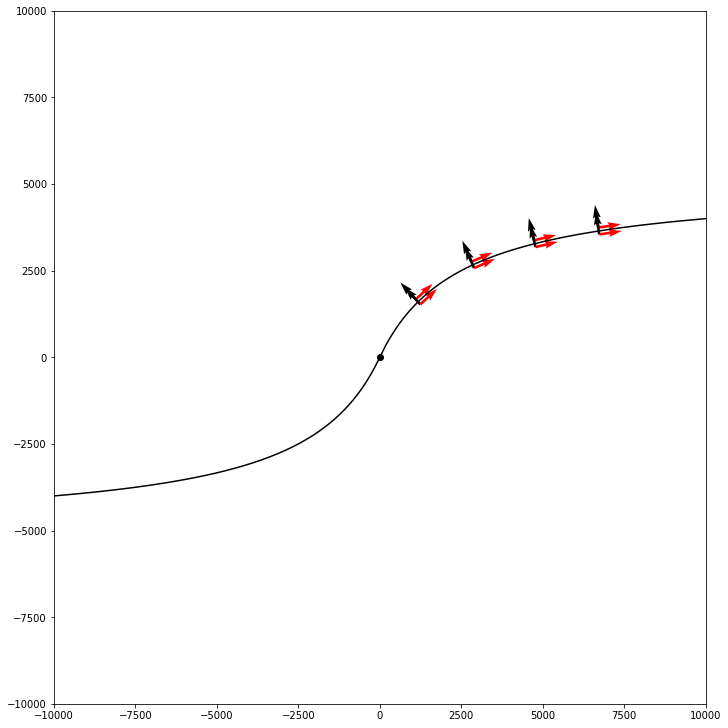

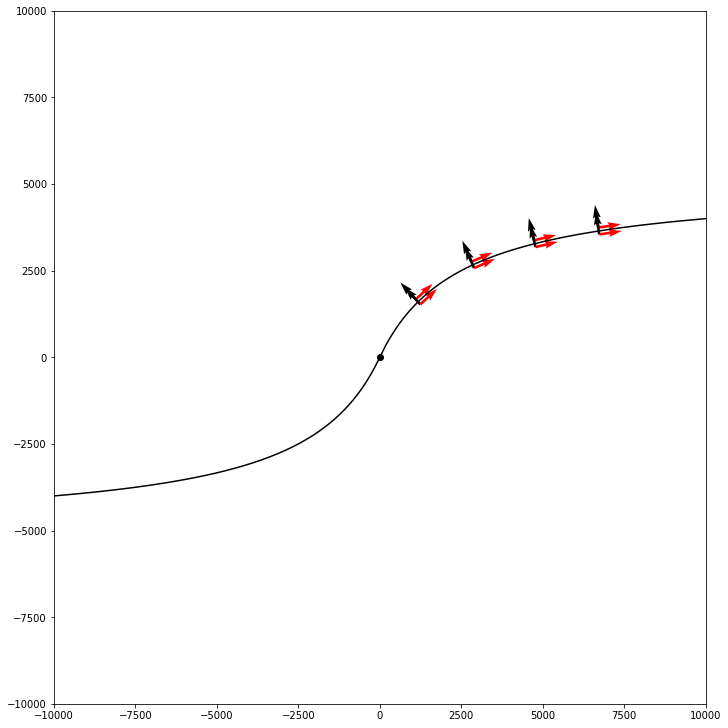

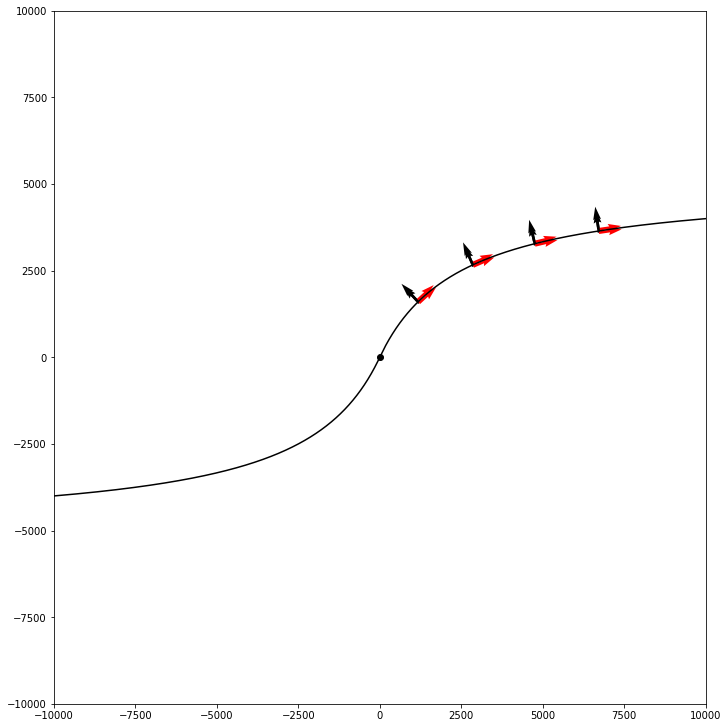

In [6]:

fig1 = plt.figure(0,figsize = (10, 10), constrained_layout=True)
PlotSigmoid(fig1)
[QuiverPlot(File)for File in File1]

fig2 = plt.figure(1,figsize = (10, 10), constrained_layout=True)
PlotSigmoid(fig2)
[QuiverPlot(File)for File in File2]

fig3 = plt.figure(2,figsize = (10, 10), constrained_layout=True)
PlotSigmoid(fig3)
[QuiverPlot(File)for File in File3]

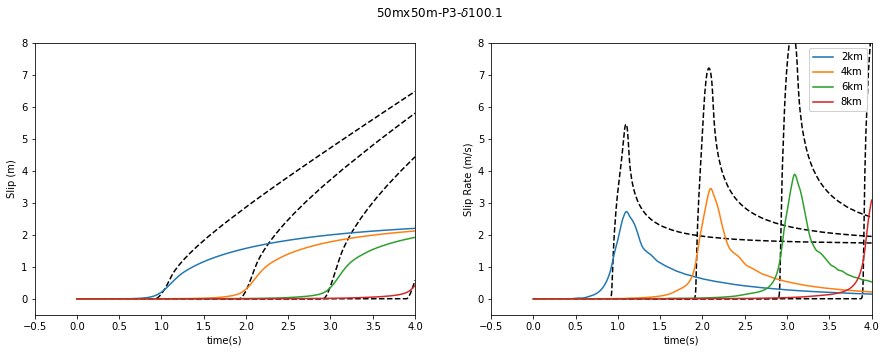

In [7]:
fig, axis = GenericFigAxis()


for Test1 in File1:
    axis[0].plot(Test1.Time, Test1.Slip)
    axis[1].plot(Test1.Time, Test1.SlipRate)
    
format_axes(fig)
fig.suptitle("50mx50m-P3-$\delta$100.1")
[item.PlotReference(axis[0], "Slip", filtering=True) for item in RefList]
[item.PlotReference(axis[1], "SlipRate", filtering=True) for item in RefList]

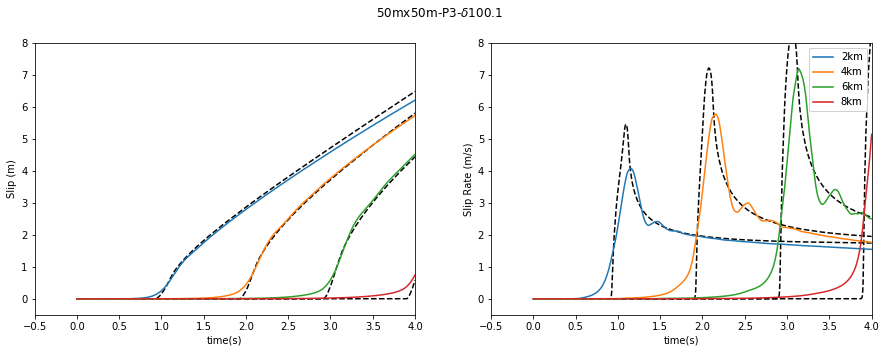

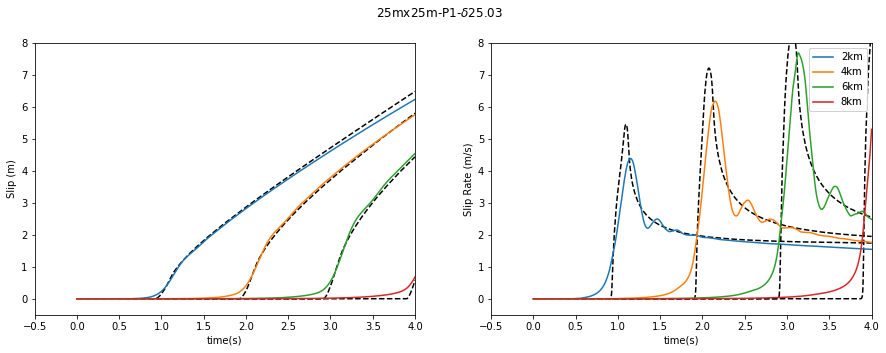

In [8]:
fig, axis = GenericFigAxis()


for Test1 in File2:
    axis[0].plot(Test1.Time, Test1.Slip)
    axis[1].plot(Test1.Time, Test1.SlipRate)
    
format_axes(fig)
fig.suptitle("50mx50m-P3-$\delta$100.1")
[item.PlotReference(axis[0], "Slip", filtering=True) for item in RefList]
[item.PlotReference(axis[1], "SlipRate", filtering=True) for item in RefList]


fig, axis = GenericFigAxis()


for Test1 in File5:
    axis[0].plot(Test1.Time, Test1.Slip)
    axis[1].plot(Test1.Time, Test1.SlipRate)
    
format_axes(fig)
fig.suptitle("25mx25m-P1-$\delta$25.03")
[item.PlotReference(axis[0], "Slip", filtering=True) for item in RefList]
[item.PlotReference(axis[1], "SlipRate", filtering=True) for item in RefList]

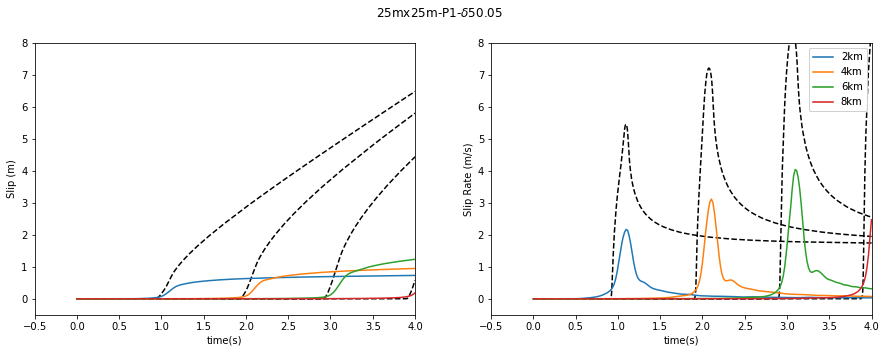

In [9]:
fig, axis = GenericFigAxis()


for Test1 in File3:
    axis[0].plot(Test1.Time, Test1.Slip)
    axis[1].plot(Test1.Time, Test1.SlipRate)
    
format_axes(fig)
fig.suptitle("25mx25m-P1-$\delta$50.05")
[item.PlotReference(axis[0], "Slip", filtering=True) for item in RefList]
[item.PlotReference(axis[1], "SlipRate", filtering=True) for item in RefList]

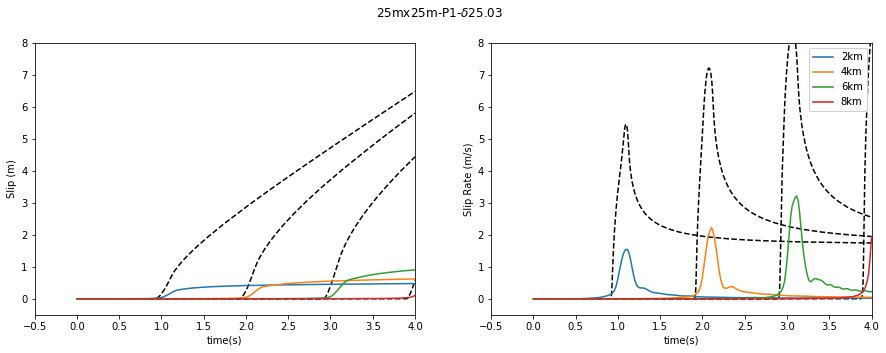

In [10]:
fig, axis = GenericFigAxis()


for Test1 in File4:
    axis[0].plot(Test1.Time, Test1.Slip)
    axis[1].plot(Test1.Time, Test1.SlipRate)
    
format_axes(fig)
fig.suptitle("25mx25m-P1-$\delta$25.03")
[item.PlotReference(axis[0], "Slip", filtering=True) for item in RefList]
[item.PlotReference(axis[1], "SlipRate", filtering=True) for item in RefList]

In [11]:

File6 = LoadPickleFile(FolderPath, "20210118-T2-50x50-P3-100.05")
File7 = LoadPickleFile(FolderPath, "20210118-T3-50x50-P3-100.05")
File8 = LoadPickleFile(FolderPath, "20210118-T5-50x50-P3-100.05")


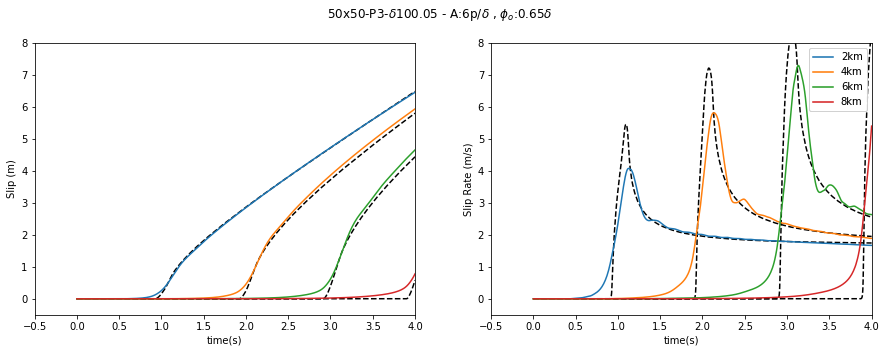

In [12]:
fig, axis = GenericFigAxis()


for Test1 in File6:
    axis[0].plot(Test1.Time, Test1.Slip)
    axis[1].plot(Test1.Time, Test1.SlipRate)
    
format_axes(fig)
fig.suptitle("50x50-P3-$\delta$100.05 - A:6p/$\delta$ , $\phi_o$:0.65$\delta$")
[item.PlotReference(axis[0], "Slip", filtering=True) for item in RefList]
[item.PlotReference(axis[1], "SlipRate", filtering=True) for item in RefList]

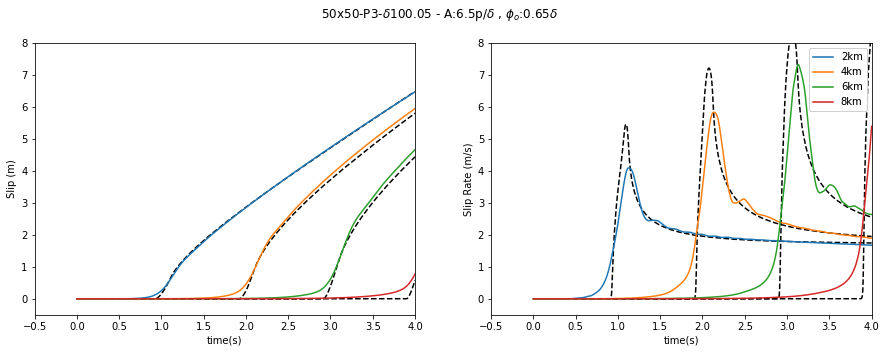

In [13]:
fig, axis = GenericFigAxis()


for Test1 in File7:
    axis[0].plot(Test1.Time, Test1.Slip)
    axis[1].plot(Test1.Time, Test1.SlipRate)
    
format_axes(fig)
fig.suptitle("50x50-P3-$\delta$100.05 - A:6.5p/$\delta$ , $\phi_o$:0.65$\delta$")
[item.PlotReference(axis[0], "Slip", filtering=True) for item in RefList]
[item.PlotReference(axis[1], "SlipRate", filtering=True) for item in RefList]

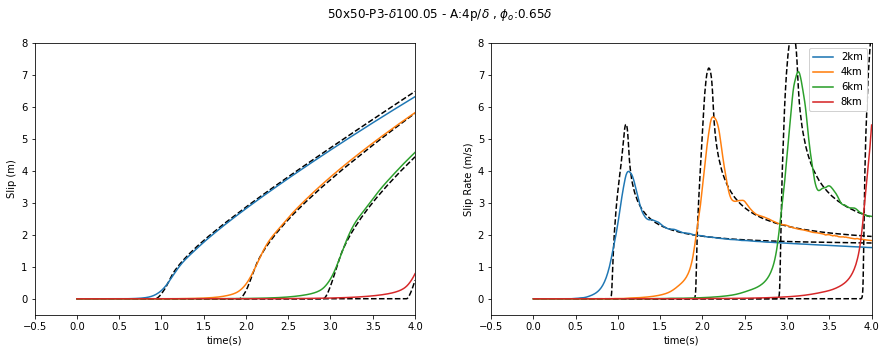

In [14]:
fig, axis = GenericFigAxis()


for Test1 in File8:
    axis[0].plot(Test1.Time, Test1.Slip)
    axis[1].plot(Test1.Time, Test1.SlipRate)
    
format_axes(fig)
fig.suptitle("50x50-P3-$\delta$100.05 - A:4p/$\delta$ , $\phi_o$:0.65$\delta$")
[item.PlotReference(axis[0], "Slip", filtering=True) for item in RefList]
[item.PlotReference(axis[1], "SlipRate", filtering=True) for item in RefList]

In [15]:
from matplotlib.colors import ListedColormap
from palettable.scientific.sequential import LaPaz_4
import matplotlib.lines as mlines

In [16]:
cmap = ListedColormap(LaPaz_4.mpl_colors[:3])
cmap.colors

[(0.10196078431372549, 0.047058823529411764, 0.39215686274509803),
 (0.21176470588235294, 0.403921568627451, 0.615686274509804),
 (0.5803921568627451, 0.6352941176470588, 0.596078431372549)]

In [17]:
def Multi_format_axes(fig,cmap, LabelsPerColor):
    for i, ax in enumerate(fig.axes):
        ax.set_xlim(-0.5,4)
        ax.set_ylim(-0.5,8)
        ax.set_xlabel("time(s)")
    Lines = []
    for idx,colcol in enumerate(cmap.colors):
        Lines.append(mlines.Line2D([], [], color = colcol,
                     linewidth=3, label=LabelsPerColor[idx]))
    
    legend2 = fig.axes[-1].legend(Lines,LabelsPerColor, loc=2)
    fig.axes[-1].add_artist(legend2)
    fig.axes[-1].set_ylabel("Slip Rate (m/s)")
    fig.axes[0].set_ylabel("Slip (m)")

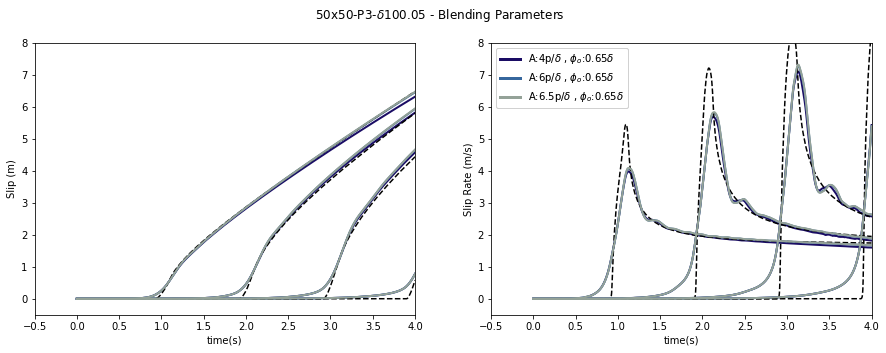

In [18]:
fig, axis = GenericFigAxis()

FilFil=[File8,File6,File7]
for iidx, FileNum in enumerate(FilFil):
    for Test1 in FileNum:
        axis[0].plot(Test1.Time, Test1.Slip, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
        axis[1].plot(Test1.Time, Test1.SlipRate, color= cmap.colors[iidx],linewidth=2,zorder=iidx)    
    
LabelsPerColor= ["A:4p/$\delta$ , $\phi_o$:0.65$\delta$",
                 "A:6p/$\delta$ , $\phi_o$:0.65$\delta$",
                 "A:6.5p/$\delta$ , $\phi_o$:0.65$\delta$"]

Multi_format_axes(fig,cmap, LabelsPerColor)
fig.suptitle("50x50-P3-$\delta$100.05 - Blending Parameters")
[item.PlotReference(axis[0], "Slip", filtering=True) for item in RefList]
[item.PlotReference(axis[1], "SlipRate", filtering=True) for item in RefList]

In [19]:
File9 = LoadPickleFile(FolderPath, "20210121-T4-50x50-P3-100.05")

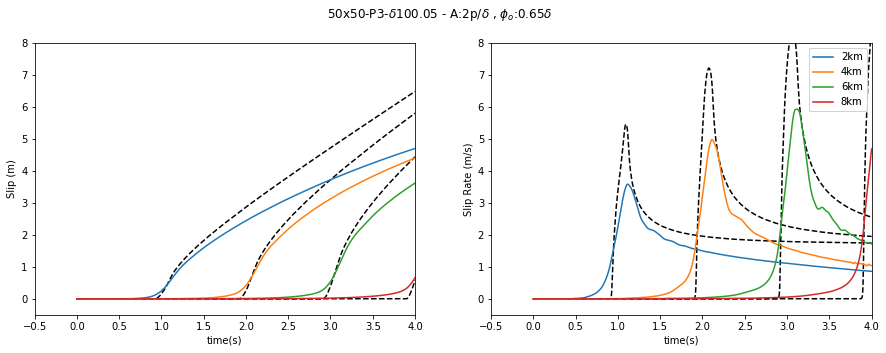

In [20]:
fig, axis = GenericFigAxis()


for Test1 in File9:
    axis[0].plot(Test1.Time, Test1.Slip)
    axis[1].plot(Test1.Time, Test1.SlipRate)
    
format_axes(fig)
fig.suptitle("50x50-P3-$\delta$100.05 - A:2p/$\delta$ , $\phi_o$:0.65$\delta$")
[item.PlotReference(axis[0], "Slip", filtering=True) for item in RefList]
[item.PlotReference(axis[1], "SlipRate", filtering=True) for item in RefList]

In [21]:
File10 = LoadPickleFile(FolderPath, "20210125-T4-50x50-P3-100.05")
File11 = LoadPickleFile(FolderPath, "20210125-T3-50x50-P4-100.05")
File12 = LoadPickleFile(FolderPath, "20210125-T2-50x50-P2-100.05")

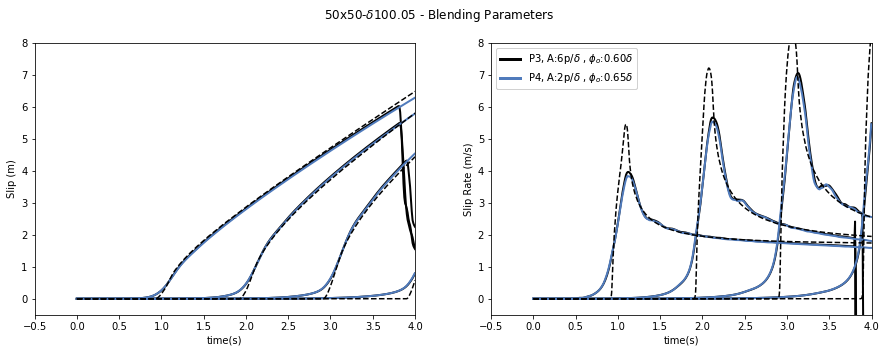

In [22]:
from palettable.scientific.sequential import Oslo_3


fig, axis = GenericFigAxis()

cmap = ListedColormap(Oslo_3.mpl_colors[:2])
cmap.colors

FilFil=[File10,File11]
for iidx, FileNum in enumerate(FilFil):
    for Test1 in FileNum:
        axis[0].plot(Test1.Time, Test1.Slip, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
        axis[1].plot(Test1.Time, Test1.SlipRate, color= cmap.colors[iidx],linewidth=2,zorder=iidx)    
    
LabelsPerColor= ["P3, A:6p/$\delta$ , $\phi_o$:0.60$\delta$",
                 "P4, A:2p/$\delta$ , $\phi_o$:0.65$\delta$"]

Multi_format_axes(fig,cmap, LabelsPerColor)
fig.suptitle("50x50-$\delta$100.05 - Blending Parameters")
[item.PlotReference(axis[0], "Slip", filtering=True) for item in RefList]
[item.PlotReference(axis[1], "SlipRate", filtering=True) for item in RefList]

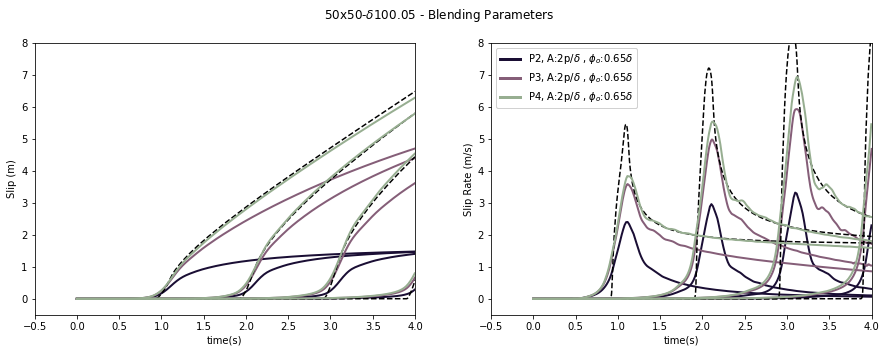

In [23]:
from palettable.scientific.sequential import Tokyo_4


fig, axis = GenericFigAxis()

cmap = ListedColormap(Tokyo_4.mpl_colors[:3])
cmap.colors

FilFil=[File12, File9, File11]
for iidx, FileNum in enumerate(FilFil):
    for Test1 in FileNum:
        axis[0].plot(Test1.Time, Test1.Slip, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
        axis[1].plot(Test1.Time, Test1.SlipRate, color= cmap.colors[iidx],linewidth=2,zorder=iidx)    
    
LabelsPerColor= ["P2, A:2p/$\delta$ , $\phi_o$:0.65$\delta$",
                 "P3, A:2p/$\delta$ , $\phi_o$:0.65$\delta$",
                 "P4, A:2p/$\delta$ , $\phi_o$:0.65$\delta$"]

Multi_format_axes(fig,cmap, LabelsPerColor)
fig.suptitle("50x50-$\delta$100.05 - Blending Parameters")
[item.PlotReference(axis[0], "Slip", filtering=True) for item in RefList]
[item.PlotReference(axis[1], "SlipRate", filtering=True) for item in RefList]

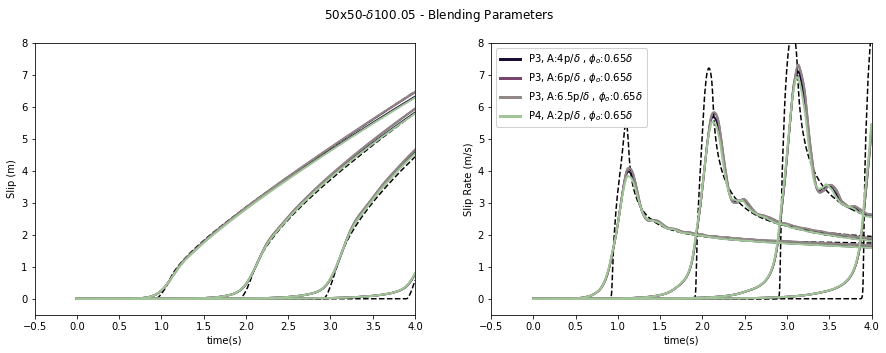

In [24]:
from palettable.scientific.sequential import Tokyo_5


fig, axis = GenericFigAxis()

cmap = ListedColormap(Tokyo_5.mpl_colors[:4])
cmap.colors

FilFil=[File8,File6,File7,File11]
for iidx, FileNum in enumerate(FilFil):
    for Test1 in FileNum:
        axis[0].plot(Test1.Time, Test1.Slip, color= cmap.colors[iidx],linewidth=2,zorder=iidx)
        axis[1].plot(Test1.Time, Test1.SlipRate, color= cmap.colors[iidx],linewidth=2,zorder=iidx)    
    
LabelsPerColor= ["P3, A:4p/$\delta$ , $\phi_o$:0.65$\delta$",
                 "P3, A:6p/$\delta$ , $\phi_o$:0.65$\delta$",
                 "P3, A:6.5p/$\delta$ , $\phi_o$:0.65$\delta$",
                 "P4, A:2p/$\delta$ , $\phi_o$:0.65$\delta$"]

Multi_format_axes(fig,cmap, LabelsPerColor)
fig.suptitle("50x50-$\delta$100.05 - Blending Parameters")
[item.PlotReference(axis[0], "Slip", filtering=True) for item in RefList]
[item.PlotReference(axis[1], "SlipRate", filtering=True) for item in RefList]

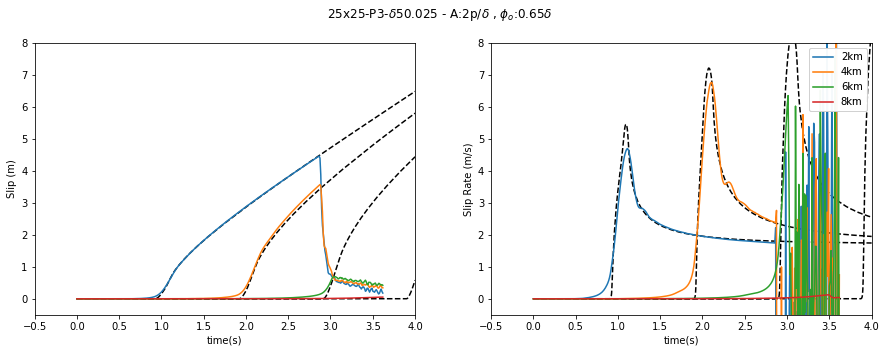

In [25]:


File13 = LoadPickleFile(FolderPath, "20210125-T1-25x25-P1-50.025")

fig, axis = GenericFigAxis()


for Test1 in File13:
    axis[0].plot(Test1.Time, Test1.Slip)
    axis[1].plot(Test1.Time, Test1.SlipRate)
    
format_axes(fig)
fig.suptitle("25x25-P3-$\delta$50.025 - A:2p/$\delta$ , $\phi_o$:0.65$\delta$")
[item.PlotReference(axis[0], "Slip", filtering=True) for item in RefList]
[item.PlotReference(axis[1], "SlipRate", filtering=True) for item in RefList]